## Banking Marketing Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("bank-full.csv", sep=';')

In [3]:
print(df.head())
print(df.info())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

In [11]:
df = pd.read_csv("bank-full.csv", sep=';')
df.columns = df.columns.str.replace('"', '').str.strip()

if 'duration' in df.columns:
    df = df.drop(columns=['duration'])

df['y'] = df['y'].astype(str).str.strip().str.replace('"', '')
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, drop_first=True)


In [12]:
print(df['y'].value_counts())


y
0    39922
1     5289
Name: count, dtype: int64


## Train Test

In [13]:
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[11815   151]
 [ 1305   293]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11966
           1       0.66      0.18      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.78      0.59      0.61     13564
weighted avg       0.87      0.89      0.86     13564

0.8926570333235034


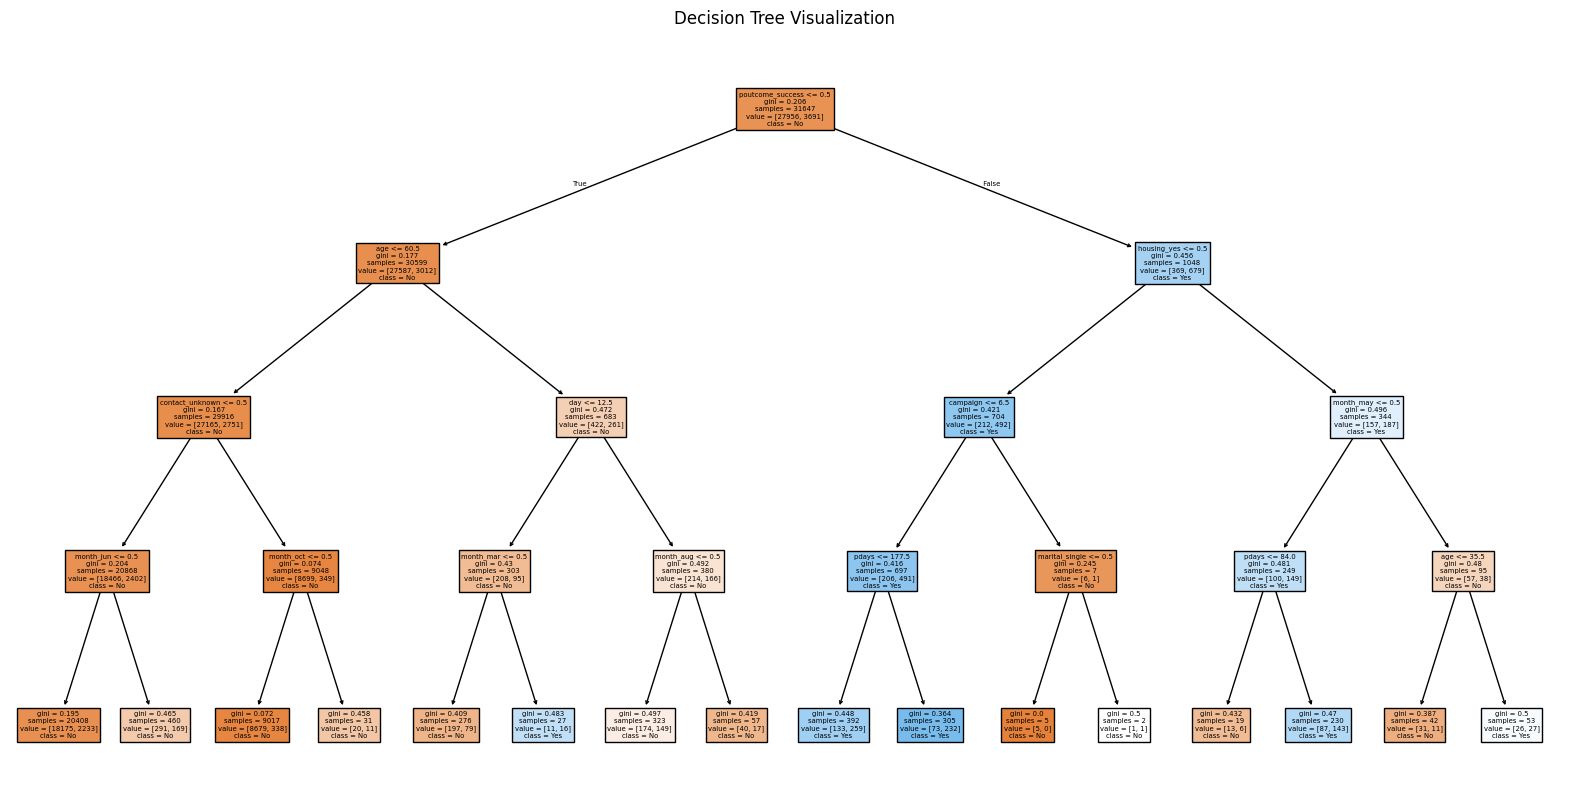

In [16]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [18]:
model.predict_proba(X_test)

array([[0.96251525, 0.03748475],
       [0.96251525, 0.03748475],
       [0.89058212, 0.10941788],
       ...,
       [0.96251525, 0.03748475],
       [0.96251525, 0.03748475],
       [0.89058212, 0.10941788]], shape=(13564, 2))

In [19]:
model.score(X_test,y_test)

0.8926570333235034

<Axes: xlabel='age', ylabel='balance'>

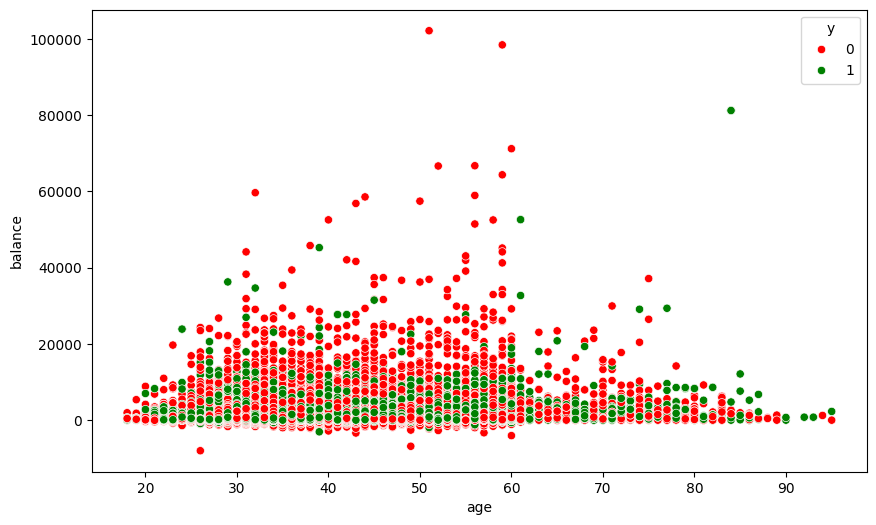

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='balance', hue='y', palette={0: 'red', 1: 'green'})